# Deep Learning with TensorFlow

![Namespace Logo](../labs.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [4]:
X = df.drop(['Price'],axis=1)

In [5]:
y = df['Price']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler()

In [10]:
X_train = sc.fit_transform(X_train)

In [11]:
X_test = sc.transform(X_test)

In [12]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [13]:
model = keras.Sequential([
    
        Dense(5,activation='relu',input_dim=5),
        Dense(5,activation='relu'),
        Dense(1,activation=keras.activations.linear)
])


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
callbacks = [
            EarlyStopping(patience = 30,mode='min',monitor='val_loss')
            ]

In [17]:
history = model.fit(X_train,y_train,epochs=600,validation_split = 0.2,callbacks=callbacks)

Epoch 1/600
175/175 [==============================] - 0s 2ms/step - loss: 240240528.0000 - mse: 240240528.0000 - val_loss: 237578080.0000 - val_mse: 237578080.0000
Epoch 2/600
175/175 [==============================] - 0s 1ms/step - loss: 236722016.0000 - mse: 236722016.0000 - val_loss: 225282528.0000 - val_mse: 225282528.0000
Epoch 3/600
175/175 [==============================] - 0s 1ms/step - loss: 183105472.0000 - mse: 183105472.0000 - val_loss: 108501120.0000 - val_mse: 108501120.0000
Epoch 4/600
175/175 [==============================] - 0s 1ms/step - loss: 41265932.0000 - mse: 41265932.0000 - val_loss: 12991586.0000 - val_mse: 12991586.0000
Epoch 5/600
175/175 [==============================] - 0s 2ms/step - loss: 12076514.0000 - mse: 12076514.0000 - val_loss: 12338758.0000 - val_mse: 12338758.0000
Epoch 6/600
175/175 [==============================] - 0s 2ms/step - loss: 11621623.0000 - mse: 11621623.0000 - val_loss: 11868398.0000 - val_mse: 11868398.0000
Epoch 7/600
175/175 [=

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 156
Trainable params: 156
Non-trainable params: 0
__________________________________________________________

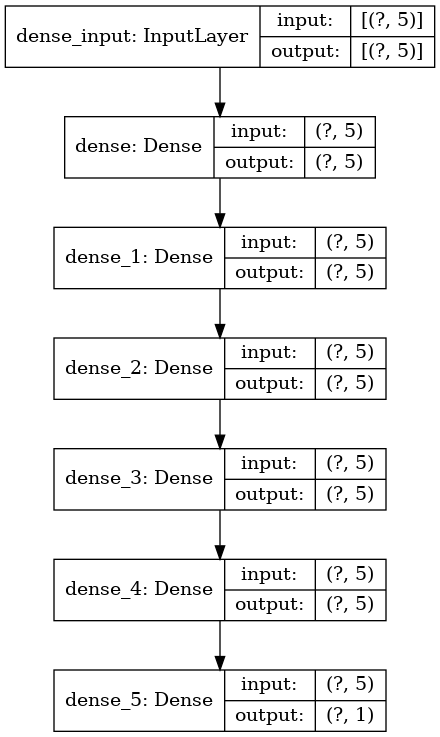

In [19]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [20]:
from sklearn import metrics
import numpy as np

In [21]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1452.706618138548
MSE: 3706779.0906157806
RMSE: 1925.2997404601135


In [22]:
y_test.shape

(3000,)

In [23]:
predictions.shape

(3000, 1)

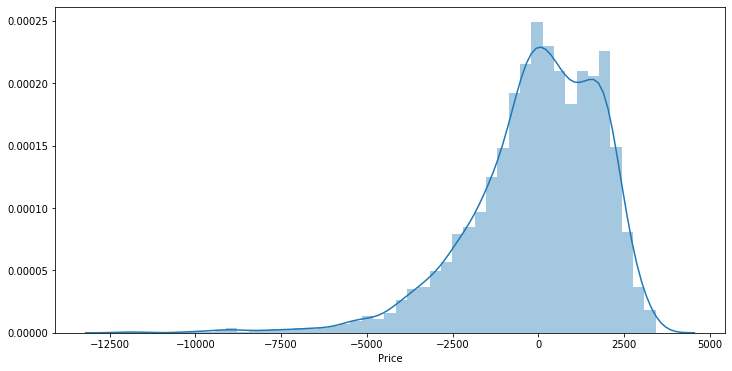

In [24]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions.reshape(3000,)));

In [25]:
losses = pd.DataFrame(history.history)

In [26]:
losses

,loss,mse,val_loss,val_mse
0,2.402405e+08,2.402405e+08,2.375781e+08,2.375781e+08
1,2.367220e+08,2.367220e+08,2.252825e+08,2.252825e+08
2,1.831055e+08,1.831055e+08,1.085011e+08,1.085011e+08
3,4.126593e+07,4.126593e+07,1.299159e+07,1.299159e+07
4,1.207651e+07,1.207651e+07,1.233876e+07,1.233876e+07
...,...,...,...,...
235,4.136224e+06,4.136224e+06,4.045058e+06,4.045058e+06
236,4.136416e+06,4.136416e+06,4.008171e+06,4.008171e+06
237,4.137132e+06,4.137132e+06,4.063812e+06,4.063812e+06
238,4.140967e+06,4.140967e+06,4.061477e+06,4.061477e+06


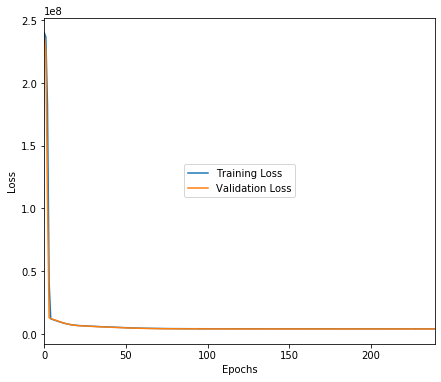

In [31]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label='Training Loss')
losses['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

Happy Learning!